<a href="https://colab.research.google.com/github/ziedjouini/machine-learning/blob/main/GridSearch_%26_Randomized_Search_zied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous allons nous replonger dans le Titanic. Le dataset se situe ici. A partir de ce dataset :

    1)Tu vas effectuer une classification supervisée sur la colonne "survived", en utilisant le classifieur decision tree. Tu dois faire apparaitre clairement l'accuracy score du jeu de test.
    2)Avec ce même classifieur, tu vas lancer une GridSearch avec les valeurs :
        tous les entiers de 1 à 50 du paramètre max_depth
        tous les entiers entre 1 et 15 du paramètre min_samples_leaf
        (2, 5, 7, 10, 15, 30) du paramètre min_samples_split

   3)Avec cette recherche via GridSearch, quelles sont le meilleures valeurs des hyperparamètres si on cherche à maximiser l'accuracy score ?
    4)Avec ce même classifieur, tu vas lancer un RandomSearch sur les mêmes valeurs des paramètres en limitant à 200 itérations.
    5)Avec cette recherche via RandomSearch, quelles sont le meilleures valeurs des hyperparamètres si on cherche à maximiser l'accuracy score ?



    Le notebook Colab est partagé

    La classification est effectuée avec un decision tree

    La recherche de paramètre via GridSearch est effectuée

    Les meilleurs paramètres sont clairement mis en avant

    La recherche de paramètre via RandomSearch est effectuée

    Les meilleurs paramètres sont clairement mis en avant


https://www.youtube.com/watch?v=cJhu1D0y2cs

https://www.youtube.com/watch?v=R89ZL-YePNE&list=PLBSCvBlTOLa8Xp1tjW0C3So94zhDbTTvh&index=3

In [2]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import matplotlib.pyplot as plt

In [5]:
titanic=pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
#titanic=pd.read_csv('/content/titanic.csv')
#titanic = sns.load_dataset('titanic')
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
#pd.get_dummies(titanic, columns =['Sex'])
#titanic2=pd.concat([titanic , titanic['Sex'].str.get_dummies()], axis = 1)
#titanic2.head(5)
#titanic1=pd.get_dummies(titanic, columns =['Sex'])
#titanic1

#titanic['Sex'].replace(['male','female'],[0,1],inplace=True)

In [6]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#https://www.youtube.com/watch?time_continue=362&v=YvEx0IGKTko&feature=emb_logo
#import label encoder
#from sklearn.processing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [8]:
titanic['Sex']=label_encoder.fit_transform(titanic['Sex'])

In [9]:
titanic['Sex'].unique()

array([1, 0])

In [10]:
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [11]:
#titanic2.columns
#titanic1.columns
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [12]:
# Split into train and test splits using the "survived" column as target, without random state  and a test size of 20%
#Tu vas effectuer une classification supervisée sur la colonne "survived", en effectuant un traintestsplit (sans fixer le random_state),
# INSERT CODE HERE
from sklearn.model_selection import train_test_split
X = titanic.drop(['Survived','Name'],axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 887
The length of the train dataset is   : 709
The length of the test dataset is    : 178


In [13]:
X.head(5)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [14]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
X.shape,y.shape

((887, 6), (887,))

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((709, 6), (178, 6), (709,), (178,))

In [17]:
from sklearn.tree import DecisionTreeClassifier
modelDTC=DecisionTreeClassifier()
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# And now we compare both scores :
print("\nScore for the Train dataset :", modelDTC.score(X_train, y_train))
print("Score for the Test dataset :", modelDTC.score(X_test, y_test))


Score for the Train dataset : 0.9858956276445698
Score for the Test dataset : 0.7247191011235955


In [19]:
from sklearn.metrics import classification_report


print(classification_report(y_test, modelDTC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       111
           1       0.62      0.67      0.65        67

    accuracy                           0.72       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.73      0.72      0.73       178



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred = modelDTC.predict(X_test))  
cm

array([[85, 26],
       [19, 48]])

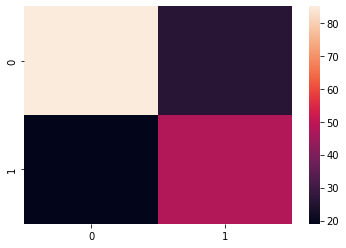

In [ ]:
sns.heatmap(cm)

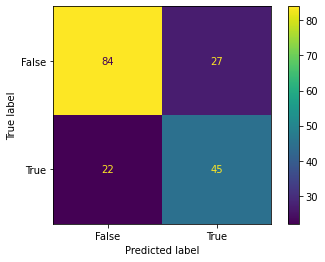

In [20]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = modelDTC.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

In [21]:
# O==death , 1== Survived
print(modelDTC.classes_)

[0 1]


In [22]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [23]:
print(modelDTC.feature_importances_)

[0.11396069 0.33458335 0.23995266 0.05829933 0.02074845 0.23245551]


In [27]:
#important#https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda
#https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
from sklearn.model_selection import GridSearchCV
grid_param={'max_depth':np.arange(1,51),
            'min_samples_leaf':np.arange(1,16),
            'min_samples_split':(2, 5, 7, 10, 15, 30)
            
            }

In [28]:
grid=GridSearchCV(DecisionTreeClassifier(), grid_param , cv=6)

In [29]:
grid.fit(X,y)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'min_samples_split': (2, 5, 7, 10, 15, 30)})

grid.fit(X,y)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),

                         'min_samples_split': (2, 5, 7, 10, 15, 30)})

# best score: 0.8354323711466569
best parameters: {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'min_samples_split': (2, 5, 7, 10, 15, 30)})

In [31]:
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

best score: 0.8392204339362864
best parameters: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [32]:
#Pour avoir plus de détail, nous pouvons utiliser cv_results_:
grid.cv_results_

{'mean_fit_time': array([0.00505376, 0.00577688, 0.00347078, ..., 0.00275453, 0.0027293 ,
        0.00271893]),
 'std_fit_time': array([1.78687365e-03, 1.79073008e-03, 3.48095691e-04, ...,
        7.81138572e-05, 1.36753493e-04, 2.29831471e-04]),
 'mean_score_time': array([0.00276915, 0.00261613, 0.00266925, ..., 0.00167763, 0.00146218,
        0.0016975 ]),
 'std_score_time': array([6.67653940e-04, 1.51919439e-04, 1.97127795e-04, ...,
        1.78005763e-04, 1.06084361e-05, 3.22500397e-04]),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 50, 50, 50],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 15, 15, 15],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 5, 7, ..., 10, 15, 30],
              mask=[False, False, False, ..., Fal

In [34]:
# display the rando result 
grid_cv_data = pd.DataFrame(grid.cv_results_)
grid_cv_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005054,0.001787,0.002769,0.000668,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.756303,0.805085,0.847458,0.813559,0.762712,0.796610,0.796954,0.030870,4137
1,0.005777,0.001791,0.002616,0.000152,1,1,5,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.756303,0.805085,0.847458,0.813559,0.762712,0.796610,0.796954,0.030870,4137
2,0.003471,0.000348,0.002669,0.000197,1,1,7,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.756303,0.805085,0.847458,0.813559,0.762712,0.796610,0.796954,0.030870,4137
3,0.004038,0.001305,0.002421,0.000177,1,1,10,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.756303,0.805085,0.847458,0.813559,0.762712,0.796610,0.796954,0.030870,4137
4,0.004886,0.001962,0.002585,0.000218,1,1,15,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.756303,0.805085,0.847458,0.813559,0.762712,0.796610,0.796954,0.030870,4137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.002836,0.000178,0.001691,0.000209,50,15,5,"{'max_depth': 50, 'min_samples_leaf': 15, 'min...",0.764706,0.788136,0.813559,0.847458,0.796610,0.813559,0.804005,0.025566,3255
4496,0.002759,0.000184,0.001592,0.000156,50,15,7,"{'max_depth': 50, 'min_samples_leaf': 15, 'min...",0.764706,0.788136,0.813559,0.847458,0.796610,0.813559,0.804005,0.025566,3255
4497,0.002755,0.000078,0.001678,0.000178,50,15,10,"{'max_depth': 50, 'min_samples_leaf': 15, 'min...",0.764706,0.788136,0.813559,0.847458,0.796610,0.813559,0.804005,0.025566,3255
4498,0.002729,0.000137,0.001462,0.000011,50,15,15,"{'max_depth': 50, 'min_samples_leaf': 15, 'min...",0.764706,0.788136,0.813559,0.847458,0.796610,0.813559,0.804005,0.025566,3255


In [35]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8)

In [36]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [37]:
grid.best_index_

312

In [38]:
model_grid=grid.best_estimator_

In [39]:
model_grid.score(X_test,y_test)

0.8033707865168539

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,  model_grid.predict(X_test))  
cm

array([[99, 12],
       [23, 44]])

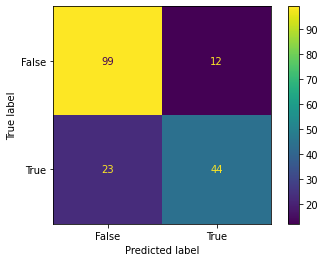

In [41]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = model_grid.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**RandomizedSearchCV**

In [42]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'max_depth':np.arange(1,50),
            'min_samples_leaf':np.arange(1,15),
            'min_samples_split':(2, 5, 7, 10, 15, 30)
            
            }

rando = RandomizedSearchCV(DecisionTreeClassifier(), grid_param , 

                           n_iter=200)

rando.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=200,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': (2, 5, 7, 10, 15,
                                                              30)})

rando.fit(X,y)

best score: 0.8252840728750079
best parameters: {'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 8}



In [43]:
print("best score:",rando.best_score_)
print("best parameters:",rando.best_params_)

best score: 0.8278893217460792
best parameters: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 4}


In [44]:
rando.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=5)

In [45]:
rando.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 4}

In [46]:
rando.best_index_

158

In [49]:
model_rando=rando.best_estimator_

In [48]:
model_rando.score(X_test,y_test)

0.7808988764044944

In [50]:
# display the rando result 
rando_cv_data = pd.DataFrame(rando.cv_results_)
rando_cv_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003431,0.001091,0.001783,0.000275,10,5,20,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.774648,0.830986,0.873239,0.767606,0.815603,0.812416,0.038701,47
1,0.002848,0.000176,0.001591,0.000116,2,9,30,"{'min_samples_split': 2, 'min_samples_leaf': 9...",0.802817,0.845070,0.873239,0.753521,0.808511,0.816632,0.040627,25
2,0.003227,0.000391,0.001935,0.000214,30,6,39,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.767606,0.823944,0.852113,0.746479,0.794326,0.796893,0.037913,167
3,0.002789,0.000045,0.001834,0.000263,2,12,36,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.767606,0.823944,0.859155,0.774648,0.787234,0.802517,0.034340,112
4,0.003056,0.000404,0.001708,0.000089,5,13,33,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.760563,0.823944,0.845070,0.774648,0.787234,0.798292,0.031467,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.002466,0.000081,0.001752,0.000222,30,6,3,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.774648,0.859155,0.830986,0.753521,0.801418,0.803946,0.037912,110
196,0.003000,0.000337,0.001613,0.000167,5,12,9,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.767606,0.823944,0.859155,0.774648,0.787234,0.802517,0.034340,112
197,0.002563,0.000115,0.001570,0.000139,5,13,25,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.760563,0.823944,0.845070,0.774648,0.787234,0.798292,0.031467,133
198,0.002280,0.000190,0.001454,0.000035,2,3,1,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.753521,0.838028,0.852113,0.725352,0.815603,0.796923,0.049174,162


In [ ]:
#conclure
print("grid score:",grid.best_score_)
print("rando score:",rando.best_score_)

grid score: 0.8392204339362864
rando score: 0.8491159724303265


In [ ]:
print("grid best parameter:",grid.best_params_)
print("rando best parameter:",rando.best_params_)

grid best parameter: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}
rando best parameter: {'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}


# ***en plus***

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dict={'criterion':['gini','entropy','log_loss'],
            'max_depth':np.arange(1,50),
            'min_samples_leaf':np.arange(1,15),
            'min_samples_split':(2, 5, 7, 10, 15, 30)
             }

In [ ]:
grid_1=GridSearchCV(DecisionTreeClassifier(), param_dict , cv=6)

In [ ]:
grid_1.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': (2, 5, 7, 10, 15, 30)})

In [ ]:
print("best score:",grid_1.best_score_)
print("best parameters:",grid_1.best_params_)

best score: 0.8420571618477899
best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}


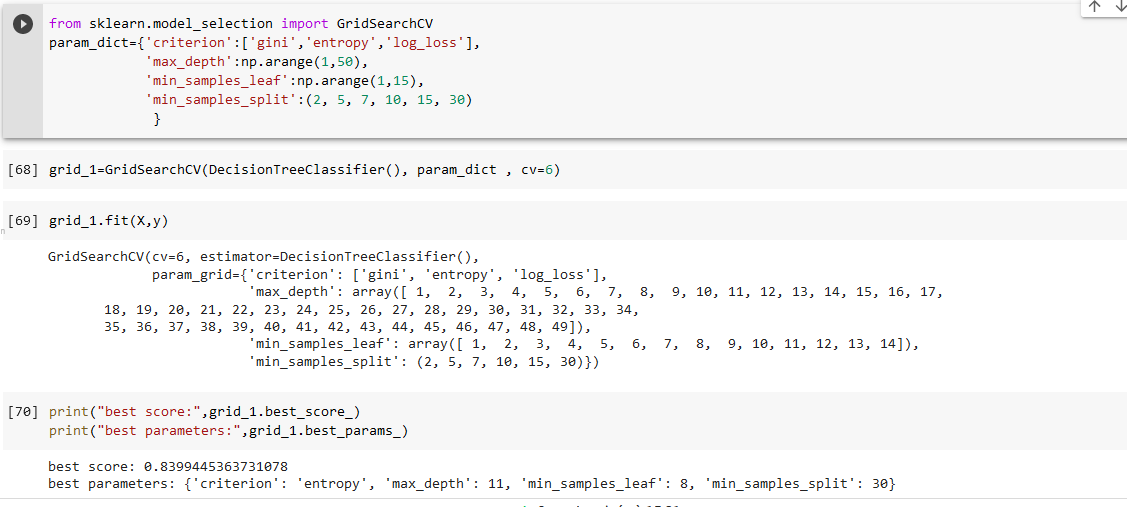

In [ ]:
rando_1 = RandomizedSearchCV(DecisionTreeClassifier(), param_dict , 

                           n_iter=200)

rando_1.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': (2, 5, 7, 10, 15,
                                                              30)})